In [1]:
import warnings
warnings.filterwarnings('ignore')

from fastai.vision import *

In [2]:
src = (ImageImageList.from_folder('./chest_xray')
       .split_by_rand_pct(0.2)
       .label_from_func(lambda x : str(x).replace('chest_xray', 'cxr_color'))
      )

In [3]:
stats = ([0.48746821, 0.48746821, 0.48746821],[0.24557937, 0.24557937, 0.24557937])

def get_data(bs, size):
    data = (src.transform(get_transforms(), size=size, tfm_y=True)
           .databunch(bs=bs)
           .normalize(stats, do_y=True)
           )
    data.c = 3
    return data

In [4]:
data = get_data(64, 128)
data

ImageDataBunch;

Train: LabelList (4685 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: chest_xray;

Valid: LabelList (1171 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: chest_xray;

Test: None

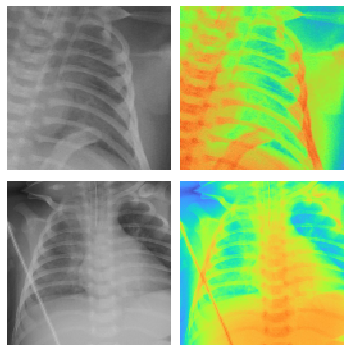

In [5]:
data.show_batch(rows=2, figsize=(5,5))

In [6]:
learn = unet_learner(data, models.resnet34, loss_func=MSELossFlat())

In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.363818,0.357564,01:11
1,0.256366,0.103437,01:11
2,0.211360,0.078754,01:12
3,0.188849,0.079357,01:12
4,0.175200,0.076156,01:12


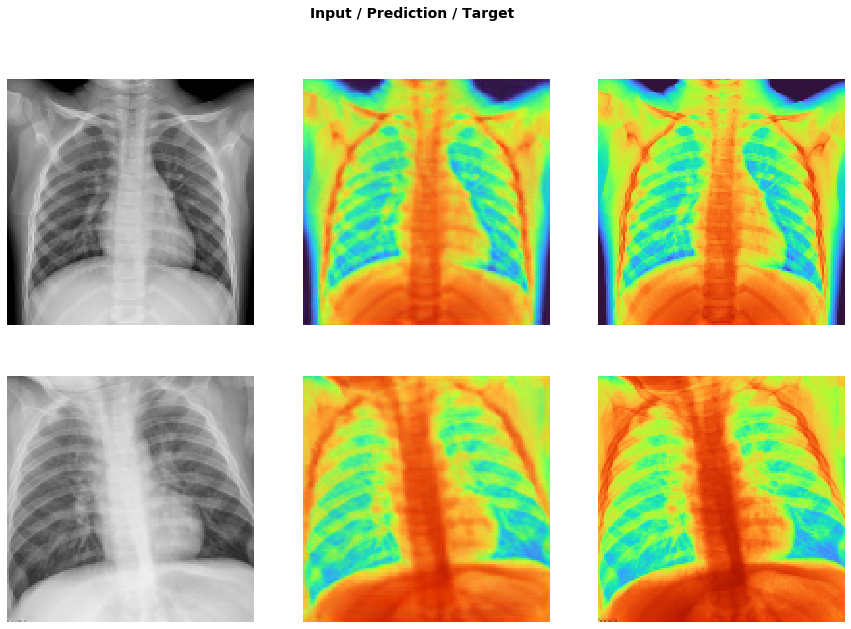

In [8]:
learn.show_results(rows=2, imgsize=5)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


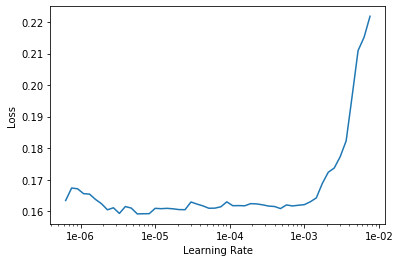

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [10]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr/40, lr))

epoch,train_loss,valid_loss,time
0,0.178488,0.095716,01:11
1,0.179675,0.085304,01:11
2,0.158964,0.087783,01:12
3,0.141417,0.080428,01:12
4,0.127184,0.068029,01:12


In [11]:
learn.save('128')

In [12]:
learn.load('128');

In [13]:
data = get_data(16, 256)
learn.data = data
learn.freeze()
gc.collect()

153

In [14]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.207270,0.102626,01:39
1,0.488928,0.102009,01:37
2,0.212058,0.065071,01:37
3,0.203199,0.068349,01:37
4,0.195366,0.064312,01:37


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


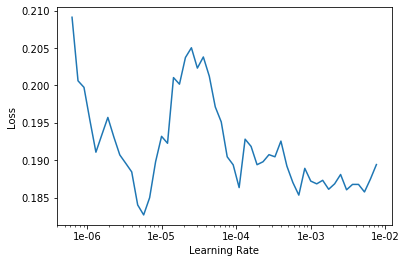

In [15]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [16]:
lr = 5e-5 # This was a mistake: I meant to put 5e-6.
learn.fit_one_cycle(5, slice(lr/40, lr))

epoch,train_loss,valid_loss,time
0,0.192575,0.065879,01:41
1,0.197366,0.067628,01:41
2,0.183126,0.064654,01:41
3,0.195273,0.064875,01:41
4,0.199489,0.064603,01:41


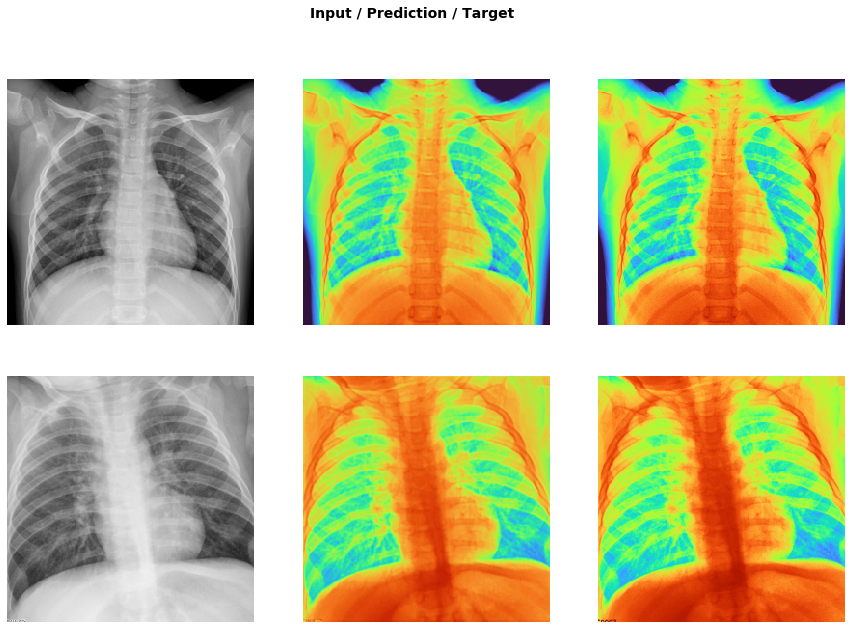

In [17]:
learn.show_results(rows=2, imgsize=5)

In [18]:
learn.export()